In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv('Assignment_OOT_Data.csv')
df_train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37,VAR38
0,19981651,0.8773,Ghaziabad - Rajnagar,NaN,622010.0,77.0,Y,NaN,0.0,HDFC BANK,...,0,Resident Indian,14,1,NaN,Uttar Pradesh,HDFC BANK,7901018,North 2,1
1,20524842,93.47,Delhi - Asaf Ali Road,N,7157.0,33.0,Y,16.22784,10000000.0,HDFC BANK,...,1,Resident Indian,40,1,N,Karnataka,HDFC BANK,10000000,North 1,1
2,20360827,86.61,Mumbai - Corporate,Y,27426.0,99.0,N,20.83070,18000000.0,EDM,...,1,Resident Indian,30,1,N,Maharashtra,EDM,30000000,NaN,1
3,21025282,NaN,Mumbai - Borivali,NaN,33493.0,3.0,Y,NaN,350000.0,Other Banks & CA,...,0,Resident Indian,12,0,NaN,Maharashtra,Ratnakar Bank,212857,West,1
4,19982717,0.8307,Mumbai - Corporate,NaN,12335.0,32.0,N,NaN,58326.0,HDFC BANK,...,0,Resident Indian,10,1,NaN,Maharashtra,HDFC BANK,116653,NaN,1


In [4]:
dic = pd.read_excel('Assignment - Data_Dictionary.xlsx')
dic.head()

,Variable Flag,Variable Detail
0,VAR1,Masked Policy Identifier
1,VAR2,Mapped Agent 13M Persistency
2,VAR3,Mapped Agent Branch
3,VAR4,Application Life Assured Alcohol Declaration
4,VAR5,Applicant's Policy Annualized Premium


In [5]:
df_train.columns

Index(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9',
       'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR17',
       'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR22', 'VAR23', 'VAR24', 'VAR25',
       'VAR26', 'VAR27', 'VAR28', 'VAR29', 'VAR30', 'VAR31', 'VAR32', 'VAR33',
       'VAR34', 'VAR35', 'VAR36', 'VAR37', 'VAR38'],
      dtype='object')

In [6]:
df_train.columns = dic['Variable Detail']

In [7]:
df = df_train.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
Masked Policy Identifier                                                  100000 non-null int64
Mapped Agent 13M Persistency                                              45909 non-null object
Mapped Agent Branch                                                       99998 non-null object
Application Life Assured Alcohol Declaration                              65082 non-null object
Applicant's Policy Annualized Premium                                     99998 non-null float64
Mapped Agent Vintage                                                      99998 non-null float64
Auto Debit of Premium Opted Flag(Yes/No)                                  100000 non-null object
Application Life Assured BMI                                              65070 non-null float64
Total Risk Exposure of HDFC Life w.r.t. Life Assured                      99971 non-null float64
Application  Sourcing

In [9]:
df['Mapped Agent 13M Persistency'][df['Mapped Agent 13M Persistency'] == '-'] = ''

In [10]:
df['Mapped Agent 13M Persistency'] = df['Mapped Agent 13M Persistency'].apply(pd.to_numeric)

In [11]:
df = df.drop('Masked Policy Identifier',axis =1)

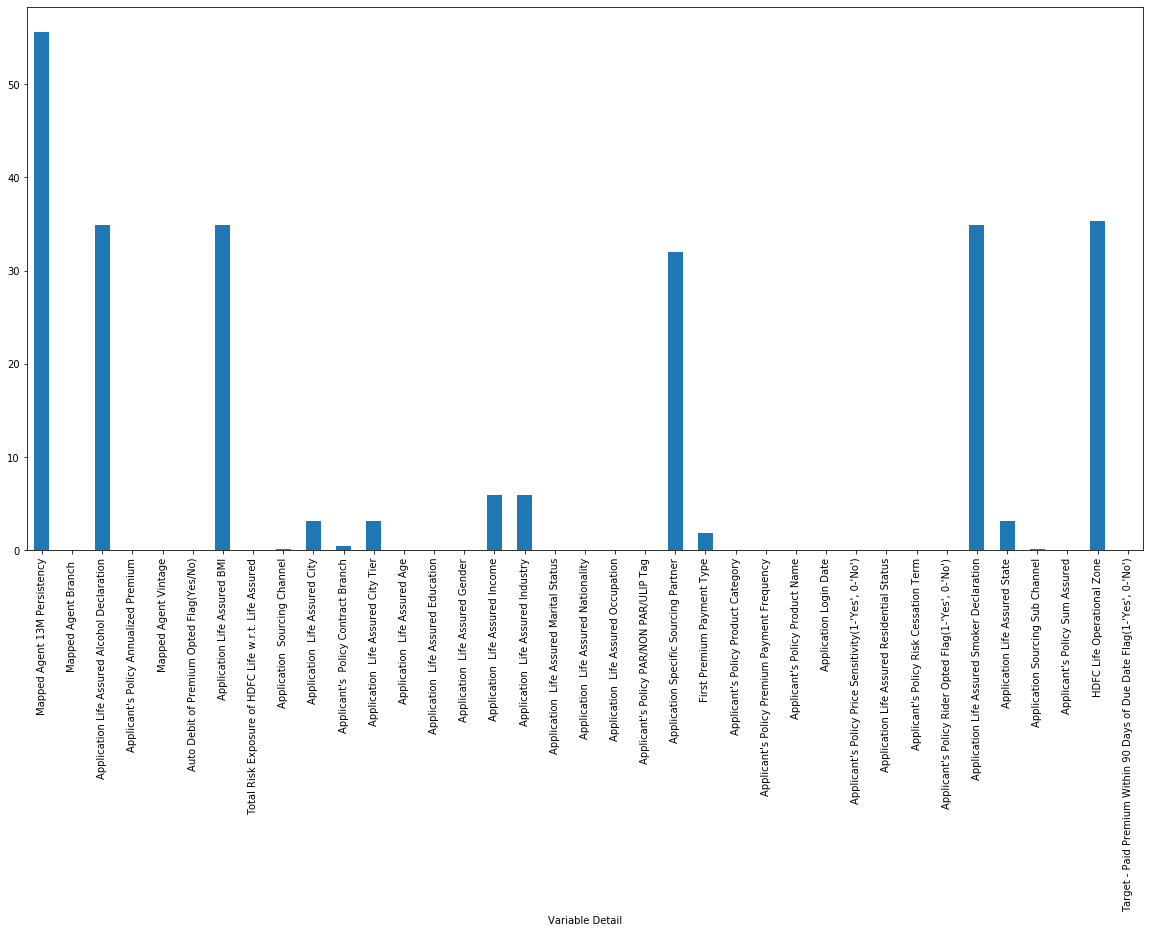

In [12]:
(df.isna().sum()/df.shape[0] * 100).plot(kind = 'bar',figsize=(20,10))

In [13]:
x = df.isna().sum()/df.shape[0] * 100
x[x > 0.0]  # missing values

Variable Detail
Mapped Agent 13M Persistency                            55.552
Mapped Agent Branch                                      0.002
Application Life Assured Alcohol Declaration            34.918
Applicant's Policy Annualized Premium                    0.002
Mapped Agent Vintage                                     0.002
Application Life Assured BMI                            34.930
Total Risk Exposure of HDFC Life w.r.t. Life Assured     0.029
Application  Sourcing Channel                            0.145
Application  Life Assured City                           3.127
Applicant's  Policy Contract Branch                      0.443
Application  Life Assured City Tier                      3.127
Application  Life Assured Age                            0.002
Application  Life Assured Education                      0.002
Application  Life Assured Gender                         0.002
Application  Life Assured Income                         5.879
Application  Life Assured Industry     

In [14]:
df.describe()

Variable Detail,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Life Assured Age,Application Life Assured Income,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Applicant's Policy Sum Assured,"Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')"
count,44448.000000,9.999800e+04,99998.000000,65070.000000,9.997100e+04,99998.000000,9.412100e+04,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,40.842592,5.923158e+04,29.900448,24.286576,2.217563e+06,37.836757,9.342781e+05,0.146700,15.591150,0.452000,2.370213e+06,0.766930
std,41.904669,1.373189e+05,29.911185,7.903450,7.956175e+06,10.935093,5.032388e+06,0.353808,9.165138,0.497693,6.653467e+06,0.422789
min,0.000000,9.200000e+02,0.000000,0.734620,0.000000e+00,-1.000000,0.000000e+00,0.000000,5.000000,0.000000,0.000000e+00,0.000000
25%,0.830700,2.390700e+04,8.000000,22.313280,2.303620e+05,30.000000,3.000000e+05,0.000000,10.000000,0.000000,2.430608e+05,1.000000
50%,8.280000,3.450000e+04,22.000000,23.888440,5.000000e+05,37.000000,5.000000e+05,0.000000,10.000000,0.000000,5.000000e+05,1.000000
75%,86.000000,5.852425e+04,38.000000,25.711660,1.200000e+06,45.000000,8.000000e+05,0.000000,16.000000,1.000000,1.399986e+06,1.000000
max,100.000000,2.000000e+07,223.000000,800.000000,7.000000e+08,69.000000,9.323434e+08,1.000000,72.000000,1.000000,7.000000e+08,1.000000


In [15]:
# Categorical Columns in df
df_cat = df[['Mapped Agent Branch ', 'Application Life Assured Alcohol Declaration',
       'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant\'s  Policy Contract Branch',
       'Application  Life Assured Education',
        'Application  Life Assured City Tier',
       'Application  Life Assured Gender',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Nationality',
       'Application  Life Assured Occupation',
       'Applicant\'s Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant\'s Policy Product Category',
       'Applicant\'s Policy Premium Payment Frequency',
       'Applicant\'s Policy Product Name', 'Application Login Date',
       'Application Life Assured Residential Status',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'Application Sourcing Sub Channel',
       'HDFC Life Operational Zone']]

In [16]:
df1 = df.drop(df_cat.columns, axis =1 )

In [17]:
df1.head()

Variable Detail,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Life Assured Age,Application Life Assured Income,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Applicant's Policy Sum Assured,"Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')"
0,0.8773,622010.0,77.0,NaN,0.0,46.0,7200000.0,0,14,1,7901018,1
1,93.4700,7157.0,33.0,16.22784,10000000.0,24.0,495000.0,1,40,1,10000000,1
2,86.6100,27426.0,99.0,20.83070,18000000.0,33.0,2500000.0,1,30,1,30000000,1
3,NaN,33493.0,3.0,NaN,350000.0,28.0,450000.0,0,12,0,212857,1
4,0.8307,12335.0,32.0,NaN,58326.0,37.0,250000.0,0,10,1,116653,1


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
Mapped Agent 13M Persistency                                              44448 non-null float64
Applicant's Policy Annualized Premium                                     99998 non-null float64
Mapped Agent Vintage                                                      99998 non-null float64
Application Life Assured BMI                                              65070 non-null float64
Total Risk Exposure of HDFC Life w.r.t. Life Assured                      99971 non-null float64
Application  Life Assured Age                                             99998 non-null float64
Application  Life Assured Income                                          94121 non-null float64
Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')                     100000 non-null int64
Applicant's Policy Risk Cessation Term                                    100000 non-null int64
Applicant's Policy 

In [19]:
df1.isna().sum()

Variable Detail
Mapped Agent 13M Persistency                                              55552
Applicant's Policy Annualized Premium                                         2
Mapped Agent Vintage                                                          2
Application Life Assured BMI                                              34930
Total Risk Exposure of HDFC Life w.r.t. Life Assured                         29
Application  Life Assured Age                                                 2
Application  Life Assured Income                                           5879
Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')                         0
Applicant's Policy Risk Cessation Term                                        0
Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')                          0
Applicant's Policy Sum Assured                                                0
Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')        0
dtype: int64

In [20]:
df1_miss = df1[['Mapped Agent 13M Persistency', 'Applicant\'s Policy Annualized Premium',
       'Mapped Agent Vintage', 'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Life Assured Age', 'Application  Life Assured Income']]

## Numeric Missing Values handling 

In [21]:
df1_miss.columns

Index(['Mapped Agent 13M Persistency', 'Applicant's Policy Annualized Premium',
       'Mapped Agent Vintage', 'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Life Assured Age', 'Application  Life Assured Income'],
      dtype='object', name='Variable Detail')

In [22]:
df['Mapped Agent 13M Persistency'][df['Mapped Agent 13M Persistency'] == 0.0].shape
# 533 values have 0 values

(533,)

In [23]:
df['Mapped Agent 13M Persistency'] =df['Mapped Agent 13M Persistency'].apply(lambda x: x * 100 if (x < 1.0) else x )

In [24]:
(df['Mapped Agent 13M Persistency'] < 1).sum()  # equal to 0

533

In [25]:
df1_miss.columns.shape  # 28 columns have missing values

(7,)

In [26]:
df1_miss.isna().sum()/df_train.shape[0] * 100

Variable Detail
Mapped Agent 13M Persistency                            55.552
Applicant's Policy Annualized Premium                    0.002
Mapped Agent Vintage                                     0.002
Application Life Assured BMI                            34.930
Total Risk Exposure of HDFC Life w.r.t. Life Assured     0.029
Application  Life Assured Age                            0.002
Application  Life Assured Income                         5.879
dtype: float64

In [27]:
df1_miss.describe()

Variable Detail,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Life Assured Age,Application Life Assured Income
count,44448.000000,9.999800e+04,99998.000000,65070.000000,9.997100e+04,99998.000000,9.412100e+04
mean,40.842592,5.923158e+04,29.900448,24.286576,2.217563e+06,37.836757,9.342781e+05
std,41.904669,1.373189e+05,29.911185,7.903450,7.956175e+06,10.935093,5.032388e+06
min,0.000000,9.200000e+02,0.000000,0.734620,0.000000e+00,-1.000000,0.000000e+00
25%,0.830700,2.390700e+04,8.000000,22.313280,2.303620e+05,30.000000,3.000000e+05
50%,8.280000,3.450000e+04,22.000000,23.888440,5.000000e+05,37.000000,5.000000e+05
75%,86.000000,5.852425e+04,38.000000,25.711660,1.200000e+06,45.000000,8.000000e+05
max,100.000000,2.000000e+07,223.000000,800.000000,7.000000e+08,69.000000,9.323434e+08


In [28]:
stdToMeanRatio = df1_miss.std()/df1_miss.mean()

In [29]:
stdToMeanRatio

Variable Detail
Mapped Agent 13M Persistency                            1.026004
Applicant's Policy Annualized Premium                   2.318340
Mapped Agent Vintage                                    1.000359
Application Life Assured BMI                            0.325425
Total Risk Exposure of HDFC Life w.r.t. Life Assured    3.587802
Application  Life Assured Age                           0.289007
Application  Life Assured Income                        5.386392
dtype: float64

**We can see attributes like 'Applicant's Policy Annualized Premium', 'Mapped Agent Vintage', 'Total Risk Exposure of HDFC Life w.r.t. Life Assured', 'Application  Life Assured Income' have high std w.r.t mean so we can't impute mean values for these.**

In [30]:
stdToMedianRatio = df1_miss.std()/df1_miss.median()

In [31]:
stdToMedianRatio

Variable Detail
Mapped Agent 13M Persistency                             5.060950
Applicant's Policy Annualized Premium                    3.980259
Mapped Agent Vintage                                     1.359599
Application Life Assured BMI                             0.330848
Total Risk Exposure of HDFC Life w.r.t. Life Assured    15.912351
Application  Life Assured Age                            0.295543
Application  Life Assured Income                        10.064776
dtype: float64

**We can see attributes like 'Applicant's Policy Annualized Premium', 'Mapped Agent Vintage', 'Total Risk Exposure of HDFC Life w.r.t. Life Assured', 'Application  Life Assured Income' have high std w.r.t median so we can't impute median values for these.**

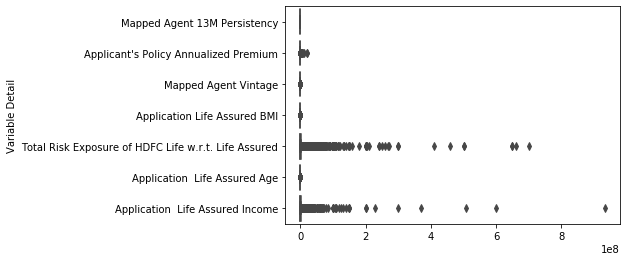

In [32]:
sns.boxplot(data= df1_miss ,palette='rainbow',orient='h')

In [33]:
df.shape

(100000, 37)

In [34]:
# remove rows of 'Applicant's Policy Annualized Premium', 'Mapped Agent Vintage', 
#'Total Risk Exposure of HDFC Life w.r.t. Life Assured', 'Application  Life Assured Age' as missing % is very less
np.where(df[['Applicant\'s Policy Annualized Premium', 'Mapped Agent Vintage',
         'Total Risk Exposure of HDFC Life w.r.t. Life Assured', 
         'Application  Life Assured Age']].isna())

(array([ 2964, 10231, 18814, 19043, 20184, 23614, 25967, 28163, 28400,
        28479, 31438, 32765, 43923, 48815, 54437, 66175, 69913, 70419,
        71168, 71168, 71168, 71168, 78994, 79558, 80757, 82162, 86639,
        88525, 88525, 88525, 88525, 90949, 93989, 94142, 96308]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 3,
        2, 2, 2, 2, 2, 0, 1, 2, 3, 2, 2, 2, 2]))

In [35]:
df.drop([ 2964, 10231, 18814, 19043, 20184, 23614, 25967, 28163, 28400,
        28479, 31438, 32765, 43923, 48815, 54437, 66175, 69913, 70419,
        71168, 71168, 71168, 71168, 78994, 79558, 80757, 82162, 86639,
        88525, 88525, 88525, 88525, 90949, 93989, 94142, 96308],inplace =True, axis =0)

In [36]:
df.shape

(99971, 37)

In [37]:
df1_miss.drop([ 2964, 10231, 18814, 19043, 20184, 23614, 25967, 28163, 28400,
        28479, 31438, 32765, 43923, 48815, 54437, 66175, 69913, 70419,
        71168, 71168, 71168, 71168, 78994, 79558, 80757, 82162, 86639,
        88525, 88525, 88525, 88525, 90949, 93989, 94142, 96308],inplace =True, axis =0)

In [38]:
df1.drop([ 2964, 10231, 18814, 19043, 20184, 23614, 25967, 28163, 28400,
        28479, 31438, 32765, 43923, 48815, 54437, 66175, 69913, 70419,
        71168, 71168, 71168, 71168, 78994, 79558, 80757, 82162, 86639,
        88525, 88525, 88525, 88525, 90949, 93989, 94142, 96308],inplace =True, axis =0)

In [39]:
df1_miss.shape

(99971, 7)

In [40]:
df1.shape

(99971, 12)

In [41]:
df1_miss.isna().sum()/df_train.shape[0] * 100

Variable Detail
Mapped Agent 13M Persistency                            55.537
Applicant's Policy Annualized Premium                    0.000
Mapped Agent Vintage                                     0.000
Application Life Assured BMI                            34.901
Total Risk Exposure of HDFC Life w.r.t. Life Assured     0.000
Application  Life Assured Age                            0.000
Application  Life Assured Income                         5.851
dtype: float64

In [42]:
df1_miss.drop(['Applicant\'s Policy Annualized Premium', 'Mapped Agent Vintage',
         'Total Risk Exposure of HDFC Life w.r.t. Life Assured', 
         'Application  Life Assured Age'],inplace = True,axis = 1)

In [43]:
df1_miss.isna().sum()/df_train.shape[0] * 100

Variable Detail
Mapped Agent 13M Persistency        55.537
Application Life Assured BMI        34.901
Application  Life Assured Income     5.851
dtype: float64

In [44]:
# imputing - Mapped Agent 13M Persistency

In [45]:
# imputing - Application Life Assured BMI

In [46]:
# imputing - Application  Life Assured Income

## Categorical Missing Values Handling

In [47]:
# Categorical Columns in df
df_cat = df[['Mapped Agent Branch ', 'Application Life Assured Alcohol Declaration',
       'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant\'s  Policy Contract Branch',
       'Application  Life Assured Education',
        'Application  Life Assured City Tier',
       'Application  Life Assured Gender',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Nationality',
       'Application  Life Assured Occupation',
       'Applicant\'s Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant\'s Policy Product Category',
       'Applicant\'s Policy Premium Payment Frequency',
       'Applicant\'s Policy Product Name', 'Application Login Date',
       'Application Life Assured Residential Status',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'Application Sourcing Sub Channel',
       'HDFC Life Operational Zone']]

In [48]:
df_cat.shape

(99971, 25)

In [49]:
df_cat.isna().sum()

Variable Detail
Mapped Agent Branch                                 0
Application Life Assured Alcohol Declaration    34889
Auto Debit of Premium Opted Flag(Yes/No)            0
Application  Sourcing Channel                     143
Application  Life Assured City                   3124
Applicant's  Policy Contract Branch               441
Application  Life Assured Education                 0
Application  Life Assured City Tier              3124
Application  Life Assured Gender                    0
Application  Life Assured Industry               5845
Application  Life Assured Marital Status            0
Application  Life Assured Nationality               0
Application  Life Assured Occupation                0
Applicant's Policy PAR/NON PAR/ULIP Tag             0
Application Specific Sourcing Partner           32025
First Premium Payment Type                       1853
Applicant's Policy Product Category                 0
Applicant's Policy Premium Payment Frequency        0
Applicant's 

In [50]:
df_cat_miss = df_cat[['Application Life Assured Alcohol Declaration',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant\'s  Policy Contract Branch',
       'Application  Life Assured City Tier',
       'Application  Life Assured Industry',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'Application Sourcing Sub Channel',
       'HDFC Life Operational Zone']]

In [51]:
df_cat_miss.head()

Variable Detail,Application Life Assured Alcohol Declaration,Application Sourcing Channel,Application Life Assured City,Applicant's Policy Contract Branch,Application Life Assured City Tier,Application Life Assured Industry,Application Specific Sourcing Partner,First Premium Payment Type,Application Life Assured Smoker Declaration,Application Life Assured State,Application Sourcing Sub Channel,HDFC Life Operational Zone
0,NaN,HDFC BANK,Ghaziabad,Ghaziabad - Rajnagar,Tier II,Legal And Justice,HDFC BANK,DD,NaN,Uttar Pradesh,HDFC BANK,North 2
1,N,HDFC BANK,bangalore,Delhi - Nehru Place,Tier I,Trading,HDFC BANK,"ECS,SI",N,Karnataka,HDFC BANK,North 1
2,Y,EDM,mumbai,Mumbai - HUB,Tier I,Insurance,NaN,Online Credit/Debit Card/Teles Sales,N,Maharashtra,EDM,NaN
3,NaN,Other Banks & CA,thane,Mumbai - Borivali,Tier I,Consultant,RBL Bank Ltd,Online Credit/Debit Card/Teles Sales,NaN,Maharashtra,Ratnakar Bank,West
4,NaN,HDFC BANK,Pandharpur,Mumbai - HUB,Tier III,Sales And Marketing,HDFC BANK,Online Credit/Debit Card/Teles Sales,NaN,Maharashtra,HDFC BANK,NaN


In [52]:
df_cat_miss.isna().sum()

Variable Detail
Application Life Assured Alcohol Declaration    34889
Application  Sourcing Channel                     143
Application  Life Assured City                   3124
Applicant's  Policy Contract Branch               441
Application  Life Assured City Tier              3124
Application  Life Assured Industry               5845
Application Specific Sourcing Partner           32025
First Premium Payment Type                       1853
Application Life Assured Smoker Declaration     34889
Application Life Assured State                   3122
Application Sourcing Sub Channel                  143
HDFC Life Operational Zone                      35259
dtype: int64

In [53]:
df.shape

(99971, 37)

In [54]:
df = df.dropna(how = 'any',subset = ['Application  Sourcing Channel', 'Applicant\'s  Policy Contract Branch',
  'Application Sourcing Sub Channel'])

In [56]:
df.isna().sum()

Variable Detail
Mapped Agent 13M Persistency                                              55163
Mapped Agent Branch                                                           0
Application Life Assured Alcohol Declaration                              34514
Applicant's Policy Annualized Premium                                         0
Mapped Agent Vintage                                                          0
Auto Debit of Premium Opted Flag(Yes/No)                                      0
Application Life Assured BMI                                              34526
Total Risk Exposure of HDFC Life w.r.t. Life Assured                          0
Application  Sourcing Channel                                                 0
Application  Life Assured City                                             3120
Applicant's  Policy Contract Branch                                           0
Application  Life Assured City Tier                                        3120
Application  Life Assure

In [57]:
df_cat = df_cat.dropna(how = 'any',subset = ['Application  Sourcing Channel', 'Applicant\'s  Policy Contract Branch',
  'Application Sourcing Sub Channel'])

In [58]:
df_cat_miss = df_cat_miss.dropna(how = 'any',subset = ['Application  Sourcing Channel', 'Applicant\'s  Policy Contract Branch',
  'Application Sourcing Sub Channel'])

In [59]:
df_cat_miss.drop(['Application  Sourcing Channel', 'Applicant\'s  Policy Contract Branch',
  'Application Sourcing Sub Channel'],axis =1, inplace = True)

In [60]:
df_cat_miss.isna().sum()

Variable Detail
Application Life Assured Alcohol Declaration    34514
Application  Life Assured City                   3120
Application  Life Assured City Tier              3120
Application  Life Assured Industry               5835
Application Specific Sourcing Partner           31502
First Premium Payment Type                       1665
Application Life Assured Smoker Declaration     34514
Application Life Assured State                   3118
HDFC Life Operational Zone                      34742
dtype: int64

In [61]:
df_cat_miss['Application Life Assured Alcohol Declaration'].value_counts()

N    62531
Y     2342
Name: Application Life Assured Alcohol Declaration, dtype: int64

In [62]:
df_cat_miss['Application  Life Assured City'].value_counts().head()

mumbai       2371
pune         1683
bangalore    1629
Mumbai       1556
Bangalore    1393
Name: Application  Life Assured City, dtype: int64

In [63]:
df_cat_miss['Application  Life Assured City Tier'].value_counts()

Tier III    49570
Tier I      25306
Tier II     21391
Name: Application  Life Assured City Tier, dtype: int64

In [64]:
df_cat_miss['Application  Life Assured Industry'].value_counts().head()

Business         7944
Agriculture      6036
Service          4843
Education        3418
Manufacturing    3071
Name: Application  Life Assured Industry, dtype: int64

In [65]:
df_cat_miss['Application Specific Sourcing Partner'].value_counts().head()

HDFC BANK                     49722
HDFC Sales Private Limited     3501
RBL Bank Ltd                   1916
HDFC SECURITIES LIMITED        1279
DUMMY HDFC BANK UPSELL         1099
Name: Application Specific Sourcing Partner, dtype: int64

In [66]:
df_cat_miss['First Premium Payment Type'].value_counts()

Cheque                                  22382
Online Credit/Debit Card/Teles Sales    21150
Online-Bill                             20408
DD                                      16699
Online Netbanking                        5987
Journal Entry                            5845
ECS,SI                                   4770
Credit Card Mandate                       420
Cash                                       61
Name: First Premium Payment Type, dtype: int64

In [67]:
df_cat_miss['Application Life Assured Smoker Declaration'].value_counts()

N    63653
Y     1220
Name: Application Life Assured Smoker Declaration, dtype: int64

In [68]:
df_cat_miss['Application Life Assured State'].value_counts()

Maharashtra                  15054
Uttar Pradesh                10022
Gujarat                       7223
Punjab                        6563
Tamil Nadu                    6212
Delhi                         5865
Haryana                       5375
West Bengal                   5071
Karnataka                     5035
Rajasthan                     3882
Madhya Pradesh                3659
Telangana                     3369
Andhra Pradesh                2779
Odisha                        2766
Kerala                        2389
Bihar                         2003
Assam                         1598
Jharkhand                     1350
Chattisgarh                   1150
Himachal Pradesh               984
Uttarakhand                    972
Jammu & Kashmir                747
Chandigarh                     426
Goa                            382
Manipur                        331
Meghalaya                      209
Tripura                        140
Pondicherry                    137
Dadra & Nagar Haveli

In [69]:
df_cat_miss['HDFC Life Operational Zone'].value_counts()

North 1    15657
West       15295
East       12994
North 2     8060
South 1     7667
South 2     4972
Name: HDFC Life Operational Zone, dtype: int64

In [70]:
df_cat_miss.columns

Index(['Application Life Assured Alcohol Declaration',
       'Application  Life Assured City', 'Application  Life Assured City Tier',
       'Application  Life Assured Industry',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'HDFC Life Operational Zone'],
      dtype='object', name='Variable Detail')

In [71]:
## dropping all missing values rows

In [72]:
df = df.dropna(how = 'any',subset = ['Application Life Assured Alcohol Declaration',
       'Application  Life Assured City', 'Application  Life Assured City Tier',
       'Application  Life Assured Industry',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'HDFC Life Operational Zone'])

In [73]:
df_cat = df_cat.dropna(how = 'any',subset = ['Application Life Assured Alcohol Declaration',
       'Application  Life Assured City', 'Application  Life Assured City Tier',
       'Application  Life Assured Industry',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'HDFC Life Operational Zone'])

In [74]:
df.shape

(25327, 37)

In [75]:
df_cat.shape

(25327, 25)

In [76]:
df.isna().sum()

Variable Detail
Mapped Agent 13M Persistency                                              14138
Mapped Agent Branch                                                           0
Application Life Assured Alcohol Declaration                                  0
Applicant's Policy Annualized Premium                                         0
Mapped Agent Vintage                                                          0
Auto Debit of Premium Opted Flag(Yes/No)                                      0
Application Life Assured BMI                                                  2
Total Risk Exposure of HDFC Life w.r.t. Life Assured                          0
Application  Sourcing Channel                                                 0
Application  Life Assured City                                                0
Applicant's  Policy Contract Branch                                           0
Application  Life Assured City Tier                                           0
Application  Life Assure

In [77]:
df = df.dropna(how = 'any',subset =['Application Life Assured BMI','Application  Life Assured Income'])

In [78]:
df.isna().sum()

Variable Detail
Mapped Agent 13M Persistency                                              14133
Mapped Agent Branch                                                           0
Application Life Assured Alcohol Declaration                                  0
Applicant's Policy Annualized Premium                                         0
Mapped Agent Vintage                                                          0
Auto Debit of Premium Opted Flag(Yes/No)                                      0
Application Life Assured BMI                                                  0
Total Risk Exposure of HDFC Life w.r.t. Life Assured                          0
Application  Sourcing Channel                                                 0
Application  Life Assured City                                                0
Applicant's  Policy Contract Branch                                           0
Application  Life Assured City Tier                                           0
Application  Life Assure

In [79]:
y = df['Mapped Agent 13M Persistency']

In [80]:
y.std()/y.mean()

0.34833465706416283

In [81]:
y.std()/y.median()

0.3179740080432891

In [ ]:
x = df['Mapped Agent 13M Persistency'].median()
x

In [ ]:
## replacing missing values of 'Mapped Agent 13M Persistency' with median
df['Mapped Agent 13M Persistency'][df['Mapped Agent 13M Persistency'].isna()] = x

In [ ]:
df.isna().sum()

In [ ]:
df.to_csv('data', index=False)